In [1]:
# If running in Google Colab, uncomment the following lines to install necessary packages
#!pip install warp-lang==1.7.0
#!pip install --upgrade git+https://github.com/psheehan/pinball-warp.git

In [2]:
from pinballrt.sources import Star
from pinballrt.grids import UniformCartesianGrid
from pinballrt.model import Model

import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np

In [3]:
star = Star()
star.set_blackbody_spectrum()

In [4]:
model = Model(grid=UniformCartesianGrid, grid_kwargs={"ncells":9, "dx":2.0*u.au})

density = np.ones(model.grid.shape)*1.0e-16 * u.g / u.cm**3

model.add_density(density, "yso.dst")
model.add_star(star)

Warp CUDA error: Could not open libcuda.so.
Warp CUDA error: Function cuDriverGetVersion_f: a suitable driver entry point was not found
Warp CUDA error 36 (in function cuda_driver_version, /builds/omniverse/warp/warp/native/warp.cu:1719)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Warp 1.7.0 initialized:
   CUDA Toolkit 12.8, Driver 0.0 (insufficient CUDA driver version!)
   Devices:
     "cpu"      : "x86_64"
   Kernel cache:
     /home/codespace/.cache/warp/1.7.0
Warp UserWarning: 
   Insufficient CUDA driver version.
   The minimum required CUDA driver version is 12.0, but the installed CUDA driver version is 0.0.
   Visit https://github.com/NVIDIA/warp/blob/main/README.md#installing for guidance.


/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/opt/conda/envs/warp/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [5]:
timing = model.thermal_mc(nphotons=100000, device="cpu", return_timing=True, Qthresh=1.04, Delthresh=1.02)

Iteration 0
Module pinballrt.sources 1808836 load on device 'cpu' took 1.38 ms  (cached)
Module pinballrt.grids 6050fd5 load on device 'cpu' took 0.56 ms  (cached)
Module pinballrt.utils 08b2efb load on device 'cpu' took 0.18 ms  (cached)


  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:00<00:00, 136069.67it/s]


0
Iteration 1


100%|██████████| 100000/100000 [00:01<00:00, 59305.12it/s]


1
Iteration 2


100%|██████████| 100000/100000 [00:06<00:00, 15053.82it/s]


2 1.6300793 4.077577
Iteration 3


100%|██████████| 100000/100000 [00:12<00:00, 8148.52it/s]


3 1.186649 1.3736829
Iteration 4


100%|██████████| 100000/100000 [00:14<00:00, 7040.34it/s]


4 1.0709466 1.1080375
Iteration 5


100%|██████████| 100000/100000 [00:09<00:00, 10122.58it/s]


5 1.0405034 1.0292581
Iteration 6


100%|██████████| 100000/100000 [00:09<00:00, 10346.00it/s]


6 1.0352205 1.0051031
Iteration 7


100%|██████████| 100000/100000 [00:09<00:00, 10568.28it/s]


7 1.0335326 1.0016332
Iteration 8


100%|██████████| 100000/100000 [00:09<00:00, 10465.86it/s]


8 1.0373166 1.0036612
Iteration 9


100%|██████████| 100000/100000 [00:09<00:00, 11079.90it/s]

9 1.0351183 1.0021236


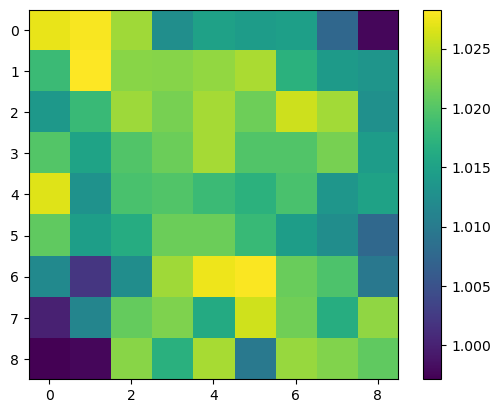

In [7]:
radmc_temperature = np.load("../pinballrt/tests/data/radmc3d_cartesian_temperature.npy")

diff = radmc_temperature / model.grid.grid.temperature.numpy()

#plt.imshow(model.grid_list["cpu"][0].grid.temperature.numpy()[:,:,4])
plt.imshow(diff[:,:,4])
plt.colorbar()
plt.show()

In [8]:
image = model.make_image(npix=256, pixel_size=0.2*u.arcsec, lam=np.array([1., 1000.])*u.micron, incl=45.*u.degree, pa=45.*u.degree, distance=1.*u.pc, device='cpu', nphotons=1000000)

100%|██████████| 1000000/1000000 [01:05<00:00, 15249.55it/s]


Time: 71.93020367622375


100%|██████████| 1000000/1000000 [00:01<00:00, 596476.66it/s]


Time: 7.500217437744141
65536
Module pinballrt.camera 1417a13 load on device 'cpu' took 1.04 ms  (cached)


In [11]:
import os
scattering = np.load(os.path.join("../pinballrt/tests", f"data/UniformCartesianGrid_E2E_scattering.npz"))['scattering']

In [16]:
from pinballrt.utils import calculate_Qvalue
calculate_Qvalue(scattering, model.grid.scattering.numpy(), percentile=98., clip=0.1)

np.float32(1.0815129)

In [ ]:
import xarray as xr
base_image = xr.open_dataset(os.path.join("../pinballrt/tests", f"data/UniformCartesianGrid_E2E_image.nc"))

In [19]:
calculate_Qvalue(image.intensity, base_image.intensity, percentile=99.0, clip=0.1)

np.float64(1.023641513611232)

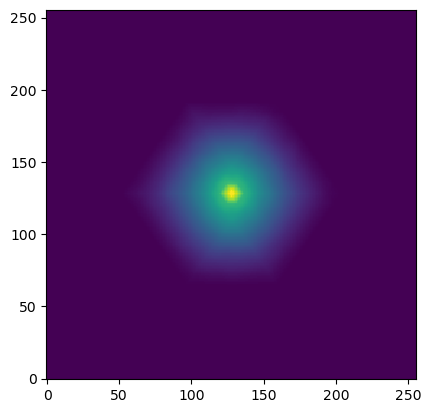

In [9]:
plt.imshow(image.intensity[:,:,1], origin="lower", interpolation="none")
plt.show()